### Topic: Classification

**Settings: Where applicable, use test_size=.30, random_state=4444. This will permit comparison of results across users.



#### Challenge 1 

#####  Congressional Voting Records Dataset

Load the data into a pandas dataframe. Replace 'y's with 1s, 'n's with 0s.

Now, almost every representative has a ?. This represents the absence of a vote (they were absent or some other similar reason). If we dropped all the rows that had a ?, we would throw out most of our data. Instead, we will replace ? with the best guess in the Bayesian sense: in the absence of any other information, we will say that the probability of the representative saying YES is the ratio of others that said YES over the whole votes.

So, convert each ? to this probability (when yes=1 and no=0, this is the mean of the column)



In [4]:
# Import packages

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import cross_val_score

%matplotlib inline

In [5]:
# Read the data 

VR = pd.read_csv('house-votes-84.csv', header = None)

In [6]:
# Display the data

VR.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y,republican.
1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?,republican.
2,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n,democrat.
3,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y,democrat.
4,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y,democrat.


In [7]:
# Rename the columns

VR.columns = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', 
              '16', 'Party']

In [8]:
VR.replace('y', 1, inplace = True)
VR.replace('n', 0, inplace = True)
VR.replace('democrat.', 'democrat', inplace = True)
VR.replace('republican.', 'republican', inplace = True)

In [9]:
# Convert ? to NaN

VR.replace('?', np.NaN, inplace = True)

In [10]:
# Convert NaN to mean

VR.fillna(VR.mean(), inplace = True).head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,Party
0,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.362319,1.000000,1.0,1.0,0.0,1.000000,republican
1,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,1.0,0.0,0.812689,republican
2,0.44208,1.0,1.0,0.417453,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,1.0,0.0,0.000000,democrat
3,0.00000,1.0,1.0,0.000000,0.504762,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,0.0,0.0,1.000000,democrat
4,1.00000,1.0,1.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.423267,1.0,1.0,1.0,1.000000,democrat


#### Challenge 2

Split the data into a test and training set. Use this function:

from sklearn.cross_validation import train_test_split

In [11]:
Y = VR[['Party']]
X = VR.drop('Party', axis = 1)

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4444)

#### Challenge 3

Using scikit.learn's KNN algorithm, train a model that predicts the party (republican/democrat):

from sklearn.neighbors import KNeighborsClassifier

In [13]:
model = KNeighborsClassifier()

In [14]:
model.fit(X_train, Y_train)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [15]:
def KNN_model(X_train, Y_train):
    score_list = []
    for n in range(1, 21):
        model = KNeighborsClassifier(n_neighbors=n)
        model.fit(X_train, Y_train)
        pred = model.predict(X_test)
        score = accuracy_score(Y_test, pred)
        score_list.append((n, score))
    return score_list

In [16]:
KNN_model(X_train, Y_train)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[(1, 0.9007633587786259),
 (2, 0.89312977099236646),
 (3, 0.9007633587786259),
 (4, 0.9007633587786259),
 (5, 0.91603053435114501),
 (6, 0.93129770992366412),
 (7, 0.91603053435114501),
 (8, 0.92366412213740456),
 (9, 0.93129770992366412),
 (10, 0.93129770992366412),
 (11, 0.92366412213740456),
 (12, 0.92366412213740456),
 (13, 0.92366412213740456),
 (14, 0.92366412213740456),
 (15, 0.92366412213740456),
 (16, 0.92366412213740456),
 (17, 0.92366412213740456),
 (18, 0.91603053435114501),
 (19, 0.91603053435114501),
 (20, 0.91603053435114501)]

In [17]:
sorted(KNN_model(X_train, Y_train), key = lambda x: x[1], reverse = True)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[(6, 0.93129770992366412),
 (9, 0.93129770992366412),
 (10, 0.93129770992366412),
 (8, 0.92366412213740456),
 (11, 0.92366412213740456),
 (12, 0.92366412213740456),
 (13, 0.92366412213740456),
 (14, 0.92366412213740456),
 (15, 0.92366412213740456),
 (16, 0.92366412213740456),
 (17, 0.92366412213740456),
 (5, 0.91603053435114501),
 (7, 0.91603053435114501),
 (18, 0.91603053435114501),
 (19, 0.91603053435114501),
 (20, 0.91603053435114501),
 (1, 0.9007633587786259),
 (3, 0.9007633587786259),
 (4, 0.9007633587786259),
 (2, 0.89312977099236646)]

#### Challenge 4

Make a similar model but with LogisticRegression instead, calculate test accuracy.

In [18]:
model = LogisticRegression()
model.fit(X_train, Y_train)
pred = model.predict(X_test)
score = accuracy_score(Y_test, pred)

print (score)

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.93893129771


#### Challenge 5

Make a bar graph of democrats and republicans. How many of each are there?

Make a very simple predictor that predicts 'democrat' for every incoming example.

Just make a function that takes in an X --an array or matrix with input examples--, and returns an array of the same length as X, where each value is 'democrat'. For example, if X is three rows, your function should return ['democrat','democrat','democrat']. Make a y_predicted vector using this and measure its accuracy.

Do the same with predicting 'republican' all the time and measure its accuracy.

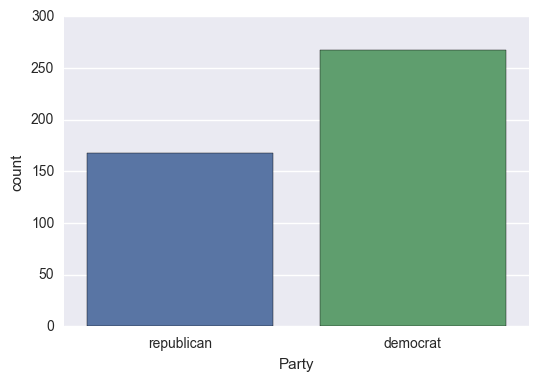

In [19]:
sns.countplot(x = 'Party', data = VR)

In [20]:
# Predictor that always predict democrat

def simple_pred_d(y):
    preds = []
    for item in y:
        pred = 'democrat'
        preds.append(pred)
    return (preds)

In [21]:
# Predictor that always predict republican

def simple_pred_r(y):
    preds = []
    for item in y:
        pred = 'republican'
        preds.append(pred)
    return (preds)

In [22]:
# Calculate accuracy score for simple democrat predictor

accuracy_score(Y, simple_pred_d(VR.Party))

0.61379310344827587

In [23]:
# Calculate accuracy score for simple republican predictor

accuracy_score(Y, simple_pred_r(VR.Party))

0.38620689655172413

#### Challenge 6

Plot the accuracies as a function of k. Since k only matters for KNN, your logistic regression accuracy, 'democrat' predictor accuracy and 'republican' predictor accuracy will stay the same over all k, so each of these three will be a horizontal line. But the KNN accuracy will change with k.



In [24]:
acc = KNN_model(X_train, Y_train)
scores_knn = [score[1] for score in acc]

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [25]:
acc_r = accuracy_score(Y, simple_pred_r(VR.Party))
acc_d = accuracy_score(Y, simple_pred_d(VR.Party))

In [26]:
acc_r_r = [acc_r for i in range(20)]
acc_r_d = [acc_d for i in range(20)]

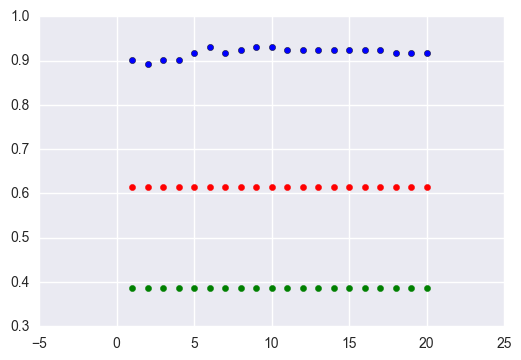

In [27]:
plt.scatter(range(1,21), scores_knn)
plt.scatter(range(1,21), acc_r_d, color = 'r')
plt.scatter(range(1,21), acc_r_r, color = 'g')

#### Challenge 7

Plot a learning curve for the logistic regression model. But instead of going through the painstaking steps of doing it yourself, use this function:

from sklearn.learning_curve import learning_curve
This will give you the m, training errors and testing errors. All you need to do is plot them. You don't even need to give it separate training/test sets. It will do crossvalidation all by itself. Easy, isn't it? : ) Remember, since it does cross-validation, it doesn't have a single training error or test error per m value. Instead, it has one for each fold (separate partition) of the cross validation. A good idea is to take the mean of these errors from different folds. This gives you a meaningful single number per m. What I mean is that doing something like:

train_cv_err = np.mean(train_err, axis=1)
test_cv_err = np.mean(ts_err, axis=1)
Before plotting m vs train_cv_err and m vs test_cv_err, where train_err and test_err are the vectors returned by the learning curve function. The np.mean(...., axis=1) means take the mean along axis 1 (axis 1 is the columns axis-- for each row, you have a bunch of columns, each corresponding to a cross validation fold, you are averaging these columns for each row).

Draw the learning curve for KNN with the best k value as well.

In [28]:
model = LogisticRegression()

m, train_acc, ts_acc = learning_curve(model, X, VR['Party'], scoring = 'accuracy')

In [29]:
train_cv_err = 1 - np.mean(train_acc, axis=1)
test_cv_err = 1 - np.mean(ts_acc, axis=1)

In [30]:
m

array([ 29,  94, 159, 224, 290])

In [31]:
train_cv_err

array([ 0.02298851,  0.0177305 ,  0.0230608 ,  0.02083333,  0.03103448])

In [32]:
test_cv_err

array([ 0.08045977,  0.07126437,  0.05977011,  0.04827586,  0.03908046])

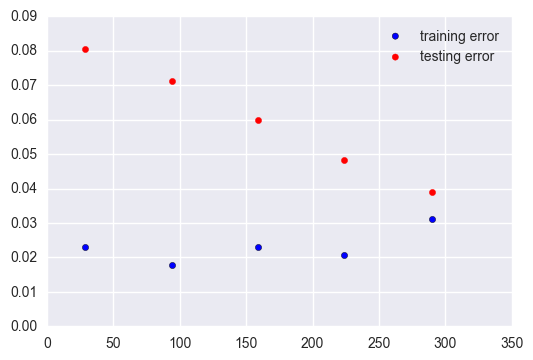

In [33]:
# Plot the learning curve with trainig error and testing error

plt.scatter(m, train_cv_err, label = 'training error')
plt.scatter(m, test_cv_err, color = 'r', label = 'testing error')
plt.legend()

In [34]:
# Repeat the process for KNN

model = KNeighborsClassifier(n_neighbors=6)

m, train_acc, ts_acc = learning_curve(model, X, VR['Party'], scoring = 'accuracy')

In [35]:
train_cv_err = 1 - np.mean(train_acc, axis=1)
test_cv_err = 1 - np.mean(ts_acc, axis=1)

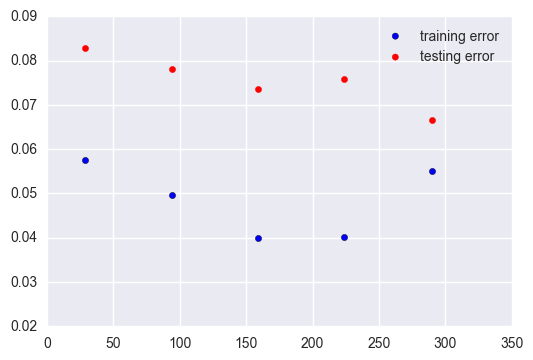

In [36]:
# Plot the learning curve with trainig error and testing error

plt.scatter(m, train_cv_err, label = 'training error')
plt.scatter(m, test_cv_err, color = 'r', label = 'testing error')
plt.legend()

#### Challenge 8

This is a preview of many other classification algorithms that we will go over. Scikit.learn has the same interface for all of these, so you can use them exactly the same way as you did LogisticRegression and KNeighborsClassifier. Use each of these to classify your data and print the test accuracy of each:

In [37]:
# Gaussian Naive Bayes model

model = GaussianNB()
model.fit(X_train, Y_train)
pred = model.predict(X_test)
score = accuracy_score(Y_test, pred)

print (score)

0.93893129771


//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
# Support Vector Machine model

model = SVC()
model.fit(X_train, Y_train)
pred = model.predict(X_test)
score = accuracy_score(Y_test, pred)

print (score)

0.954198473282


//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
# Decision Tree model

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
pred = model.predict(X_test)
score = accuracy_score(Y_test, pred)

print (score)

0.93893129771


In [40]:
# Random Forest model

model = RandomForestClassifier()
model.fit(X_train, Y_train)
pred = model.predict(X_test)
score = accuracy_score(Y_test, pred)

print (score)

0.961832061069


//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


#### Challenge 9

There is actually a way to do cross validation quickly to get your accuracy results for an algorithm, without separating training and test yourself:

from sklearn.cross_validation import cross_val_score
Just like the learning_curve function, this takes a classifier object, X and Y. Returns accuracy (or whatever score you prefer by using the scoring keyword argument). Of course, it will return a score for each cross validation fold, so to get the generalized accuracy, you need to take the mean of what it returns.

Use this function to calculate the cross validation score of each of the classifiers you tried before.

In [59]:
# Logistic Regression 

model = LogisticRegression()

train_cvs = cross_val_score(model, X, VR['Party'], scoring = 'accuracy')

np.mean(train_cvs)

0.96091954022988502

In [63]:
# KNN

model = KNeighborsClassifier()

train_cvs = cross_val_score(model, X, VR['Party'], scoring = 'accuracy')

np.mean(train_cvs)

0.93333333333333324

In [64]:
# Gaussian Naive Bayes model 

model = GaussianNB()

train_cvs = cross_val_score(model, X, VR['Party'], scoring = 'accuracy')

np.mean(train_cvs)

0.93103448275862066

In [65]:
# Support Vector Machine model

model = SVC()

train_cvs = cross_val_score(model, X, VR['Party'], scoring = 'accuracy')

np.mean(train_cvs)

0.95402298850574718

In [66]:
# Decision Tree model

model = DecisionTreeClassifier()

train_cvs = cross_val_score(model, X, VR['Party'], scoring = 'accuracy')

np.mean(train_cvs)

0.9517241379310345

In [67]:
# Random Forest model

model = RandomForestClassifier()

train_cvs = cross_val_score(model, X, VR['Party'], scoring = 'accuracy')

np.mean(train_cvs)

0.96551724137931039

#### Challenge 10

Instead of 'democrat' or 'republican', can you predict the vote of a representative based on their other votes?

Reload the data from scratch. Convert y-->1, n-->0.

Choose one vote. Build a classifier (logistic regression or KNN), that uses the other votes (do not use the party as a feature) to predict if the vote will be 1 or 0.

Convert each ? to the mode of the column (if a senator has not voted, make their vote 1 if most others voted 1, make it 0 if most others voted 0).

Calculate the cross validation accuracy of your classifier for predicting how each representative will vote on the issue.

In [124]:
VR2 = pd.read_csv('house-votes-84.csv', header = None)

In [125]:
# Rename the columns

VR2.columns = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', 
              '16', 'Party']

In [126]:
VR2.replace('y', 1, inplace = True)
VR2.replace('n', 0, inplace = True)
VR2.replace('democrat.', 'democrat', inplace = True)
VR2.replace('republican.', 'republican', inplace = True)

In [127]:
# Convert ? to NaN

VR2.replace('?', np.NaN, inplace = True)

In [144]:
# Convert NaN to mean

VR2.fillna(VR.mode().iloc[0], inplace = True).head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,Party
0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,republican
1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,republican
2,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,democrat
3,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,democrat
4,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,democrat


In [149]:
X_vote = VR2.drop(['1', 'Party'], axis = 1)
Y_vote = VR2['1']

In [155]:
# Calculate the accuracy score for KNN model

model = KNeighborsClassifier()
train_cvs = cross_val_score(model, X_vote, Y_vote, scoring = 'accuracy')
np.mean(train_cvs)

0.62746396018124873

#### Challenge 11

Back to movie data! Choose one categoric feature to predict. I chose MPAA Rating, but genre, month, etc. are all decent choices. If you don't have any non-numeric features, you can make two bins out of a numeric one (like "Runtime>100 mins" and "Runtime<=100 mins")

Make a bar graph of how many of each movie there is in the data. For example, with Ratings, show how many G, PG, PG-13, R movies there are, etc. (basically a histogram of your labels).

Predict your outcome variable (labels) using KNN and logistic regression. Calculate their accuracies.

Make a baseline stupid predictor that always predicts the label that is present the most in the data. Calculate its accuracy on a test set.

How much better do KNN and logistic regression do versus the baseline?

What are the coefficients of logistic regression? Which features affect the outcome how?

In [158]:
MV = pd.read_csv('2013_movies.csv')

In [163]:
MV.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [164]:
MV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
Title                 100 non-null object
Budget                89 non-null float64
DomesticTotalGross    100 non-null int64
Director              96 non-null object
Rating                100 non-null object
Runtime               100 non-null int64
ReleaseDate           100 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 5.5+ KB


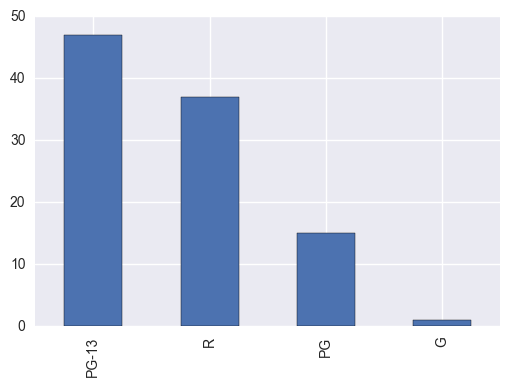

In [169]:
MV['Rating'].value_counts().plot(kind = 'bar')

In [171]:
X_movie = MV.drop(['Title', 'Director', 'Rating', 'ReleaseDate'], axis = 1)
Y_movie = MV['Rating']

In [179]:
X_movie.fillna(X_movie.mean(), inplace = True).head()

,Budget,DomesticTotalGross,Runtime
0,130000000.0,424668047,146
1,200000000.0,409013994,129
2,150000000.0,400738009,108
3,76000000.0,368061265,98
4,225000000.0,291045518,143


In [184]:
# Predict using KNN and calculate the accuracy score for KNN model

model = KNeighborsClassifier()
train_cvs = cross_val_score(model, X_movie, Y_movie, scoring = 'accuracy')
np.mean(train_cvs)

//anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:552: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=3.
  % (min_labels, self.n_folds)), Warning)


0.36144480519480515

In [185]:
# Predict using Logistics and calculate the accuracy score for KNN model

train_cvs = cross_val_score(model, X_movie, Y_movie, scoring = 'accuracy')

//anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:552: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=3.
  % (min_labels, self.n_folds)), Warning)


0.50776515151515145

In [198]:
# Show the coefficients for logistic regression

model = LogisticRegression()
model.fit(X_movie, Y_movie)
model.coef_

array([[ -9.02619557e-08,  -2.66712692e-09,  -2.48541998e-12],
       [ -9.77526625e-09,  -4.03654634e-09,  -1.66365800e-13],
       [  7.58297993e-09,  -3.76931490e-09,  -3.44374357e-14],
       [ -1.35935285e-08,   7.49823166e-10,   7.65419570e-14]])

From the coefficient, we can see that budget has the highest coefficient and most impact.

In [193]:
# Baseline model

pred_m = MV['Rating'].mode()

print ('prediction is always ' + 'PG-13')

prediction is always PG-13


In [196]:
# Calculate the accuracy using baseline model

MV['Rating'].value_counts()[0] / len(MV)

0.46999999999999997

Based on the accuracy score, logistic regression did the best, followed by baseline model and KNN.

#### Challenge 12

Now you are a classification master. The representative votes dataset only had 0s and 1s. Let's just swiftly tackle the breast cancer surgery data.

Get it from here: Haberman Survival Dataset

What is the average and standard deviation of the age of all of the patients?
What is the average and standard deviation of the age of those patients that survived 5 or more years after surgery?
What is the average and standard deviation of the age of those patients who survived fewer than 5 years after surgery?
Plot a histogram of the ages side by side with a histogram of the number of axillary nodes.
What is the earliest year of surgery in this dataset?
What is the most recent year of surgery?
Use logistic regression to predict survival after 5 years. How well does your model do?
What are the coefficients of logistic regression? Which features affect the outcome how?
Draw the learning curve for logistic regression in this case.

In [205]:
HM = pd.read_csv('haberman.csv', header = None)

In [207]:
# Rename the columns

HM.columns = ['Age', 'Yr', 'Axi', 'Surv']

In [215]:
HM.head()

,Age,Yr,Axi,Surv
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [214]:
# Average and standard deviation of the age of all of the patients

print (np.average(HM['Age']))
print (np.std(HM['Age']))

52.4575163399
10.78578520363183


In [226]:
# Average and standard deviation of the age of those patients that survived 5 or more years after surgery

print (np.average(HM[HM['Surv']==1]['Age']))
print (np.std(HM[HM['Surv']==1]['Age']))

52.0177777778
10.98765547510051


In [228]:
# Average and standard deviation of the age of those patients who survived fewer than 5 years after surgery

print (np.average(HM[HM['Surv']==2]['Age']))
print (np.std(HM[HM['Surv']==2]['Age']))

53.6790123457
10.10418219303131


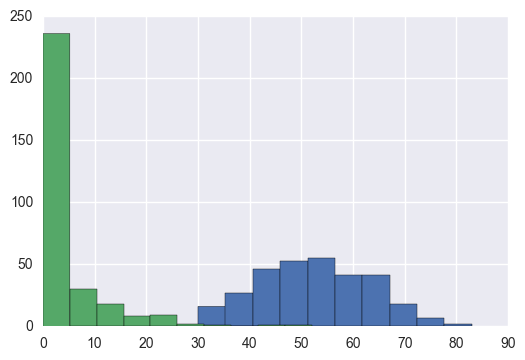

In [232]:
# Plot a histogram of the ages side by side with a histogram of the number of axillary nodes

plt.hist(HM['Age']);
plt.hist(HM['Axi']);

In [234]:
# What is the earliest year of surgery in this dataset

print (np.min(HM['Yr']))

58


In [235]:
# What is the most recent year of surgery?

print (np.max(HM['Yr']))

69


In [240]:
X_hm = HM.drop(['Surv'], axis = 1)
Y_hm = HM['Surv']

In [241]:
# Use logistic regression to predict survival after 5 years. How well does your model do?

model = LogisticRegression()

train_cvs = cross_val_score(model, X_hm, Y_hm, scoring = 'accuracy')
np.mean(train_cvs)

0.75163398692810457

In [242]:
# What are the coefficients of logistic regression? Which features affect the outcome how?

model = LogisticRegression()
model.fit(X_hm, Y_hm)
model.coef_

array([[ 0.01854689, -0.0345458 ,  0.08812314]])

Based on the coefficient we got above, one unit increase in age increases the log odds of survive by 0.018, one unit increase in year of operation decreases the log odds of survive by 0.03, one unit increase in number of positive axillary nodes detected  increases the log odds of survive by 0.088.

In [244]:
# Draw the learning curve for logistic regression in this case

model = LogisticRegression()

m, train_acc, ts_acc  = learning_curve(model, X_hm, Y_hm, scoring = 'accuracy')

train_cv_err = 1 - np.mean(train_acc, axis=1)
test_cv_err = 1 - np.mean(ts_acc, axis=1)

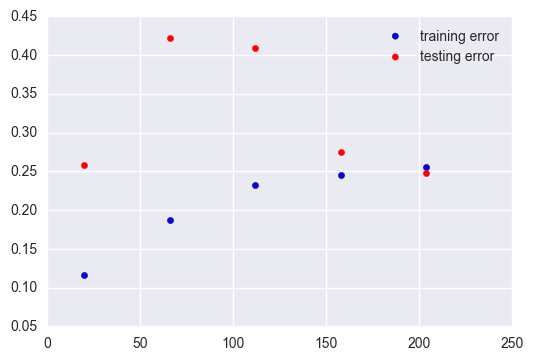

In [245]:
# Plot the learning curve with trainig error and testing error

plt.scatter(m, train_cv_err, label = 'training error')
plt.scatter(m, test_cv_err, color = 'r', label = 'testing error')
plt.legend()